In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from scipy.stats import chisquare
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

In [4]:
dataset = pd.read_csv(r'C:\Users\Mayank\Desktop\Machine_Learning_AZ_Template_Folder\celebal\customer churn\telco_customer_churn.csv',dtype={'CustomerID': str,'InvoiceID': str})

dataset.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Finding insights from the dataset

In [5]:
dataset.shape

(7043, 21)

In [6]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
nointernet_churn=dataset.loc[(dataset['InternetService'] == 'No') & (dataset['Churn'] == 
                                           'Yes')]
internet_churn=dataset.loc[((dataset['InternetService'] == 'DSL')) & (dataset['Churn'] == 
                                           'Yes')]

In [9]:
nointernet_churn.shape

(113, 21)

In [10]:
internet_churn.shape

(459, 21)

In [11]:
nointernet_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
385,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,214.75,Yes
408,4800-VHZKI,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.90,19.9,Yes


In [12]:
nointernet_nochurn=dataset.loc[(dataset['InternetService'] == 'No') & (dataset['Churn'] == 
                                           'No')]




In [13]:
nointernet_nochurn.shape

(1413, 21)

([<matplotlib.axis.XTick at 0x2a45fce0940>,
 <a list of 2 Text xticklabel objects>)

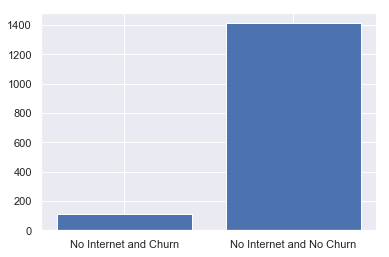

In [14]:
plt.bar([0,1], [nointernet_churn['Churn'].count(), nointernet_nochurn['Churn'].count()])
plt.xticks([0,1], ['No Internet and Churn', 'No Internet and No Churn'])



In [15]:
churn=dataset.loc[(dataset['Churn'] == 'Yes')].shape[0]

In [16]:
churn

1869

([<matplotlib.axis.XTick at 0x2a45fdbad30>,
 <a list of 2 Text xticklabel objects>)

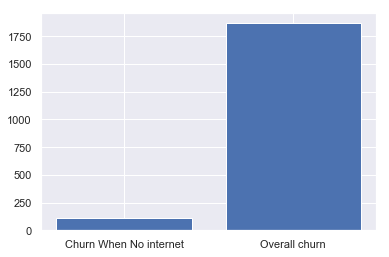

In [17]:
plt.bar([0,1], [nointernet_churn['Churn'].count(), churn])
plt.xticks([0,1], ['Churn When No internet', 'Overall churn'])

#### Calculating Ratio Of Total churn to churn when no internet service





In [18]:
nointernet_churn.shape[0]/churn

0.060460139111824504

In [19]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [20]:
nophone_nochurn=dataset.loc[(dataset['PhoneService'] == 'No') & (dataset['Churn'] == 
                                           'No')]
nophone_churn=dataset.loc[(dataset['PhoneService'] == 'No') & (dataset['Churn'] == 
                                           'Yes')]

([<matplotlib.axis.XTick at 0x2a45fd92f98>,
 <a list of 2 Text xticklabel objects>)

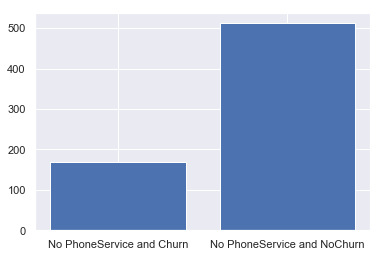

In [21]:
plt.bar([0,1], [nophone_churn['Churn'].count(),nophone_nochurn['Churn'].count()])
plt.xticks([0,1], ['No PhoneService and Churn', 'No PhoneService and NoChurn'])


([<matplotlib.axis.XTick at 0x2a46103de10>,
 <a list of 2 Text xticklabel objects>)

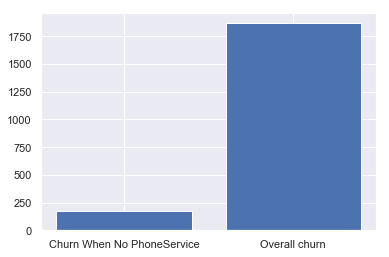

In [22]:
plt.bar([0,1], [nophone_churn['Churn'].count(), churn])
plt.xticks([0,1], ['Churn When No PhoneService', 'Overall churn'])

In [23]:
nophone_churn.shape[0]/churn

0.0909577314071696

In [24]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# customer id is unnecessary
del dataset["customerID"]

### Binary Encoding for features containing two categories

In [26]:
gender_map = {"Female" : 0, "Male": 1}
yes_no_map = {"Yes" : 1, "No" : 0}

dataset["gender"] = dataset["gender"].map(gender_map)



In [27]:

def binary_encode(features):
    for feature in features:
        dataset[feature] = dataset[feature].map(yes_no_map)

In [28]:
binary_encode_candidate = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
binary_encode(binary_encode_candidate)

In [29]:
# converting series object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors = 'coerce')

In [30]:
print(dataset.isnull().any())
print("\n# of Null values in 'TotalCharges`: ",dataset["TotalCharges"].isnull().sum())

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

# of Null values in 'TotalCharges`:  11


In [31]:
dataset.loc[dataset['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,1,0,0,1,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.25,NaN,0
936,0,0,1,1,0,1,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,NaN,0
1082,1,0,1,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,NaN,0
1340,0,0,1,1,0,0,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,NaN,0
3331,1,0,1,1,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.85,NaN,0
3826,1,0,1,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.35,NaN,0
4380,0,0,1,1,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.00,NaN,0
5218,1,0,1,1,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.70,NaN,0
6670,0,0,1,1,0,1,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,NaN,0


In [32]:
dataset["TotalCharges"].fillna(dataset["TotalCharges"].mean(), inplace=True)

In [33]:
dataset.loc[dataset['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [34]:
dataset = pd.get_dummies(dataset)

In [35]:
# now take a look at our final dataset
dataset.head(25)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
5,0,0,0,0,8,1,1,99.65,820.50,1,...,0,0,1,1,0,0,0,0,1,0
6,1,0,0,1,22,1,1,89.10,1949.40,0,...,1,0,0,1,0,0,0,1,0,0
7,0,0,0,0,10,0,0,29.75,301.90,0,...,1,0,0,1,0,0,0,0,0,1
8,0,0,1,0,28,1,1,104.80,3046.05,1,...,0,0,1,1,0,0,0,0,1,0
9,1,0,0,1,62,1,0,56.15,3487.95,0,...,1,0,0,0,1,0,1,0,0,0


In [35]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.000,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00


In [36]:
result = pd.DataFrame(columns=["Features", "Chi2Weights"])

In [37]:
for i in range(len(dataset.columns)):
    chi2, p = chisquare(dataset[dataset.columns[i]])
    result = result.append([pd.Series([dataset.columns[i], chi2], index = result.columns)], ignore_index=True)

In [38]:
result = result.sort_values(by="Chi2Weights", ascending=False)

In [39]:
result.head(20)

,Features,Chi2Weights
8,TotalCharges,1.582229e+07
4,tenure,1.312128e+05
7,MonthlyCharges,9.845178e+04
11,MultipleLines_No phone service,6.361000e+03
1,SeniorCitizen,5.901000e+03
35,Contract_One year,5.570000e+03
38,PaymentMethod_Credit card (automatic),5.521000e+03
20,OnlineBackup_No internet service,5.517000e+03
15,InternetService_No,5.517000e+03
32,StreamingMovies_No internet service,5.517000e+03


In [40]:
new_df = dataset[result["Features"].head(20)]

In [41]:
new_df.head()

,TotalCharges,tenure,MonthlyCharges,MultipleLines_No phone service,SeniorCitizen,Contract_One year,PaymentMethod_Credit card (automatic),OnlineBackup_No internet service,InternetService_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,DeviceProtection_No internet service,OnlineSecurity_No internet service,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,Contract_Two year,Churn,OnlineSecurity_Yes,TechSupport_Yes
0,29.85,1,29.85,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1889.50,34,56.95,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,108.15,2,53.85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,1840.75,45,42.30,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,151.65,2,70.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


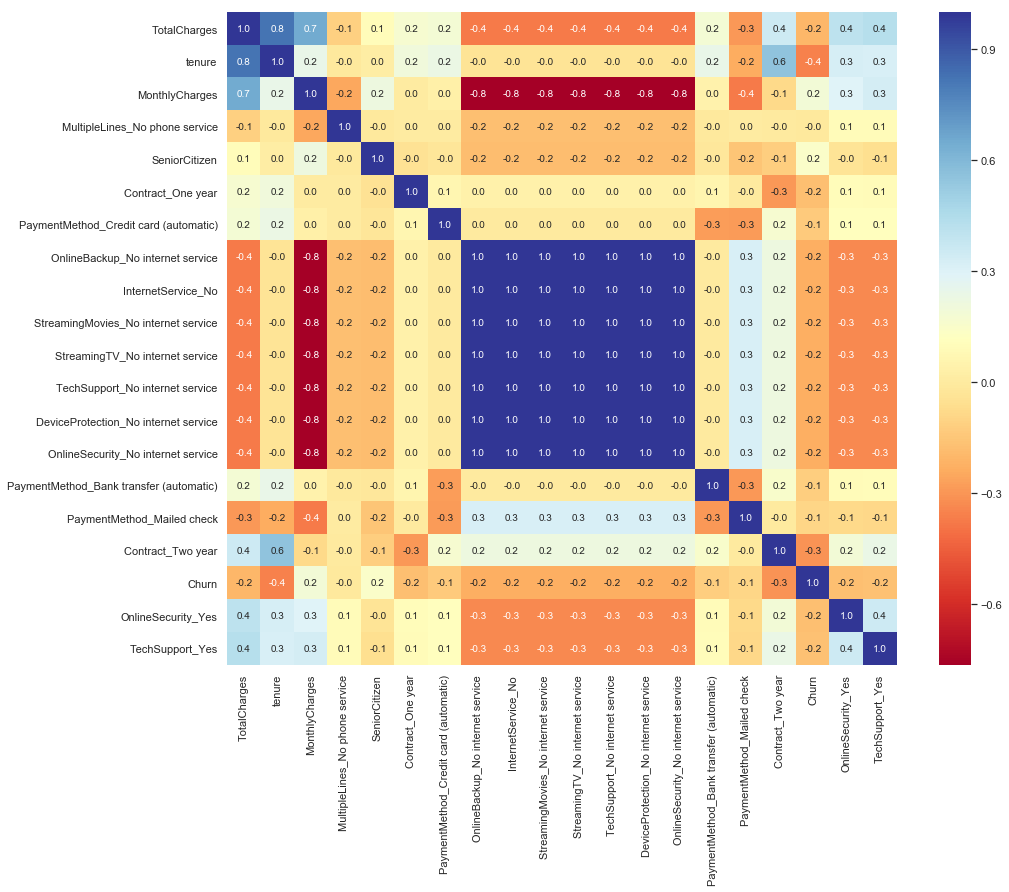

In [42]:
plt.figure(figsize = (15, 12))
sns.heatmap(new_df.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

In [44]:
hightly_corr_feature = ["OnlineBackup_No internet service", "StreamingMovies_No internet service", "StreamingTV_No internet service", 
"TechSupport_No internet service", "DeviceProtection_No internet service", "OnlineSecurity_No internet service"]

def remove_corr_features(features):
    for feature in features:
        del new_df[feature]

In [45]:
remove_corr_features(hightly_corr_feature)

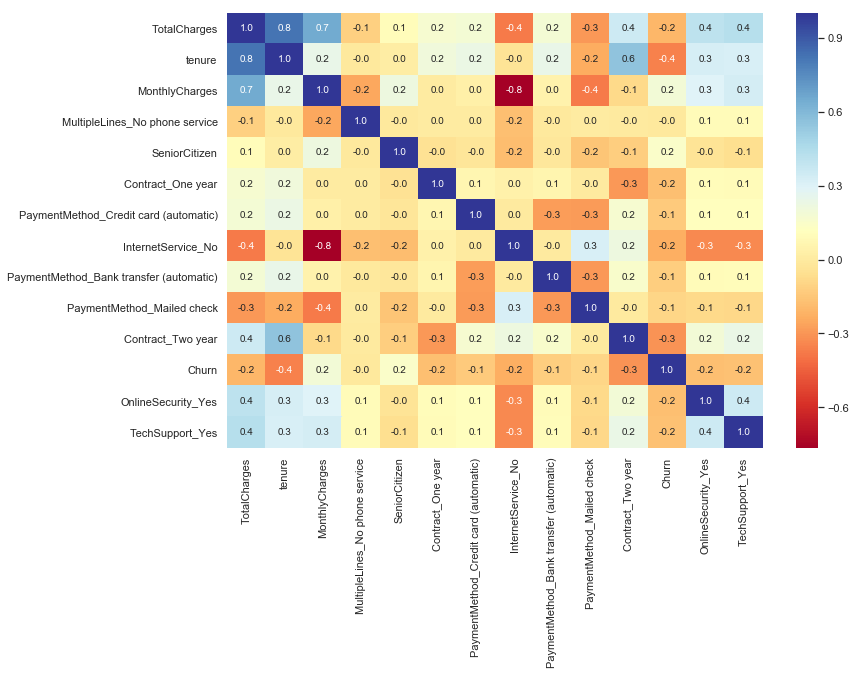

In [47]:
plt.figure(figsize = (12, 8))
sns.heatmap(new_df.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

In [48]:
trace = []

def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
        
gen_boxplot(new_df)

In [49]:
data = trace
plotly.offline.iplot(data)

### Data visualisation

In [51]:
new_df.columns

Index(['TotalCharges', 'tenure', 'MonthlyCharges',
       'MultipleLines_No phone service', 'SeniorCitizen', 'Contract_One year',
       'PaymentMethod_Credit card (automatic)', 'InternetService_No',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'Contract_Two year', 'Churn', 'OnlineSecurity_Yes', 'TechSupport_Yes'],
      dtype='object')

In [52]:
new_df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

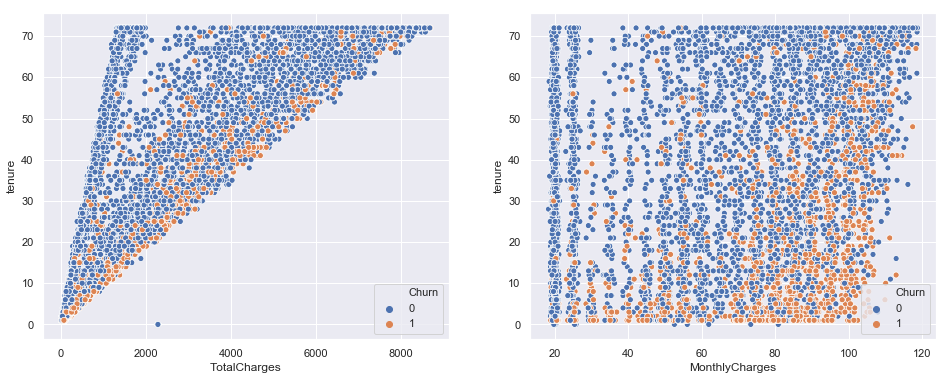

In [53]:
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=new_df, ax=ax[0])
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=new_df, ax=ax[1])

In [54]:
sns.__version__

'0.9.0'

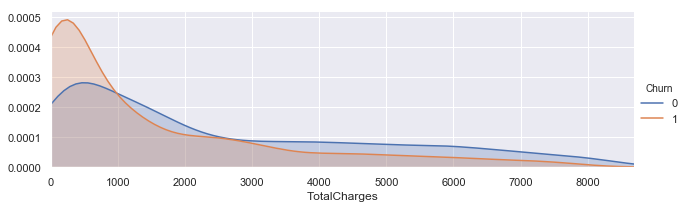

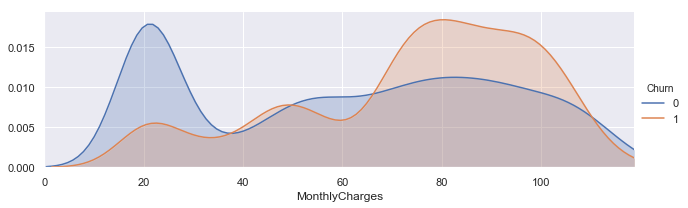

In [55]:
facet = sns.FacetGrid(new_df, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"TotalCharges",shade= True)
facet.set(xlim=(0, new_df["TotalCharges"].max()))
facet.add_legend()

facet = sns.FacetGrid(new_df, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"MonthlyCharges",shade= True)
facet.set(xlim=(0, new_df["MonthlyCharges"].max()))
facet.add_legend()

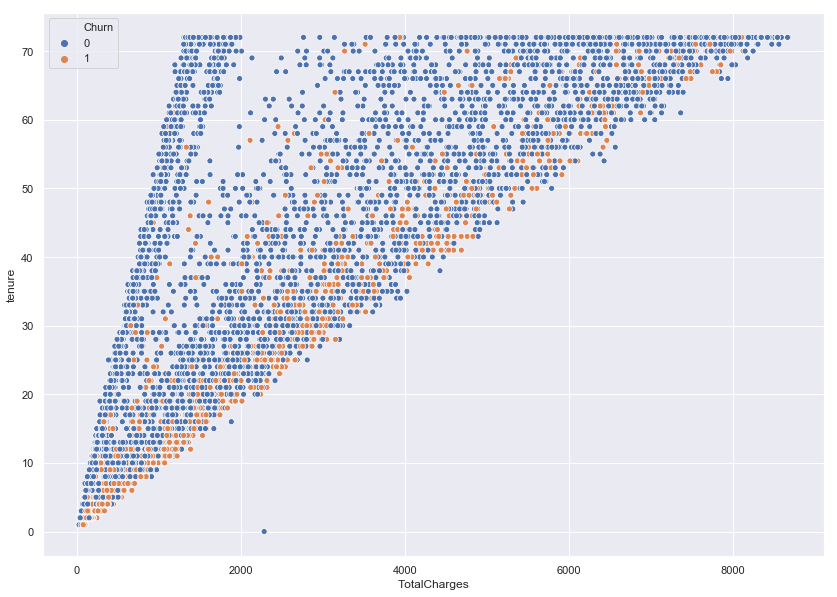

In [92]:
_, ax = plt.subplots(1, 1, figsize= (14, 10))
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=new_df)


In [61]:
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=new_df, ax=ax[0])
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=new_df, ax=ax[1])

In [68]:
#People who churn in first quartile of tenure
x = new_df.loc[(new_df['tenure'] <= 9) & (new_df['Churn'] == 1)]['MonthlyCharges'].count()
x1 = new_df.loc[(new_df['Churn'] == 1)]['MonthlyCharges'].count()
x/x1

0.4938469769930444

In [71]:
#There are a few datapoints where tenure is 0 but the total charges of all amount to a fixed 2283.300441
new_df.loc[(new_df['tenure'] == 0)]

,TotalCharges,tenure,MonthlyCharges,MultipleLines_No phone service,SeniorCitizen,Contract_One year,PaymentMethod_Credit card (automatic),InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,Contract_Two year,Churn,OnlineSecurity_Yes,TechSupport_Yes
488,2283.300441,0,52.55,1,0,0,0,0,1,0,1,0,1,1
753,2283.300441,0,20.25,0,0,0,0,1,0,1,1,0,0,0
936,2283.300441,0,80.85,0,0,0,0,0,0,1,1,0,1,0
1082,2283.300441,0,25.75,0,0,0,0,1,0,1,1,0,0,0
1340,2283.300441,0,56.05,1,0,0,1,0,0,0,1,0,1,1
3331,2283.300441,0,19.85,0,0,0,0,1,0,1,1,0,0,0
3826,2283.300441,0,25.35,0,0,0,0,1,0,1,1,0,0,0
4380,2283.300441,0,20.00,0,0,0,0,1,0,1,1,0,0,0
5218,2283.300441,0,19.70,0,0,1,0,1,0,1,0,0,0,0
6670,2283.300441,0,73.35,0,0,0,0,0,0,1,1,0,0,1


In [73]:
#People who churn in second quartile of tenure(9-29)
x2 = new_df.loc[(new_df['tenure'] > 9) & (new_df['Churn'] == 1) & (new_df['tenure'] <=29)]['MonthlyCharges'].count()
x3 = new_df.loc[(new_df['Churn'] == 1)]['MonthlyCharges'].count()
x2/x3

0.26003210272873195

In [74]:
#People who churn in second quartile of tenure(29-55)
x4 = new_df.loc[(new_df['tenure'] > 29) & (new_df['Churn'] == 1) & (new_df['tenure'] <=55)]['MonthlyCharges'].count()
x5 = new_df.loc[(new_df['Churn'] == 1)]['MonthlyCharges'].count()
x4/x5

0.17335473515248795

In [75]:
#People who churn in second quartile of tenure(55-72)
x6 = new_df.loc[(new_df['tenure'] >55) & (new_df['Churn'] == 1) & (new_df['tenure'] <=72)]['MonthlyCharges'].count()
x7 = new_df.loc[(new_df['Churn'] == 1)]['MonthlyCharges'].count()
x6/x7

0.07276618512573568

In [77]:
x7 = new_df.loc[(new_df['tenure'] <=29) & (new_df['Churn'] == 1) & (new_df['MonthlyCharges'] > 70.35)]['MonthlyCharges'].count()
x8 = new_df.loc[(new_df['Churn'] == 1)]['MonthlyCharges'].count()
x7/x8

0.4579989299090423

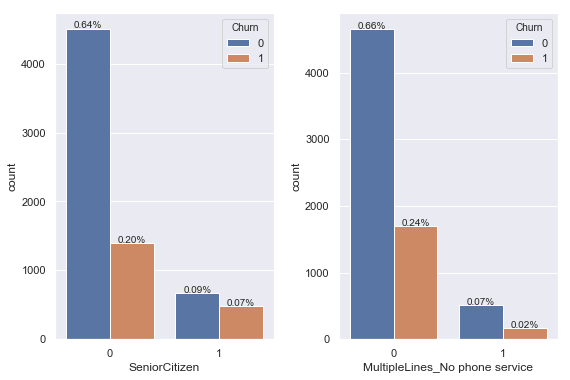

In [78]:
_, axs = plt.subplots(1, 2, figsize=(9, 6))
plt.subplots_adjust(wspace = 0.3)
ax = sns.countplot(data = new_df, x = "SeniorCitizen", hue = "Churn", ax = axs[0])
ax1 = sns.countplot(data = new_df, x = "MultipleLines_No phone service", hue = "Churn", ax = axs[1])

for p in ax.patches:
        height = p.get_height() 
        ax.text(
                p.get_x()+p.get_width()/2,
                height + 3.4,
                "{:1.2f}%".format(height/len(new_df),0),
                ha = "center", rotation = 0
               ) 
        
for p in ax1.patches:
        height = p.get_height() 
        ax1.text(
                p.get_x()+p.get_width()/2,
                height + 3.4,
                "{:1.2f}%".format(height/len(new_df),0),
                ha = "center", rotation = 0
               ) 

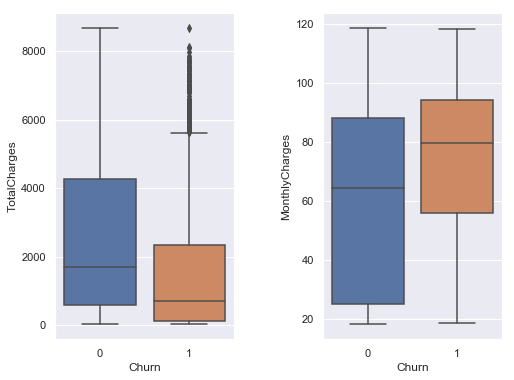

In [90]:
_, ax = plt.subplots(1, 2, figsize= (8, 6))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = 'Churn',  y = 'TotalCharges', data = new_df, ax=ax[0])
sns.boxplot(x = 'Churn',  y = 'MonthlyCharges', data = new_df, ax=ax[1])



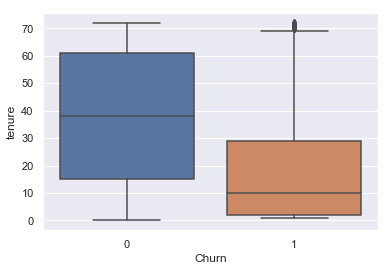

In [91]:

sns.boxplot(x = 'Churn',  y = 'tenure', data = new_df)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\legend.py:641: UserWarning:

Unrecognized location "upper-right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center




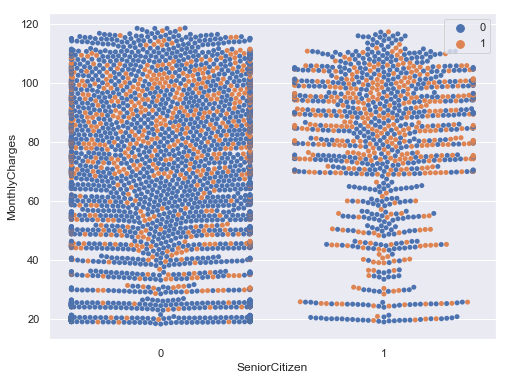

In [79]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x = 'SeniorCitizen', y = 'MonthlyCharges', hue="Churn", data = new_df)
plt.legend(loc='upper-right')

In [95]:
from sklearn.cross_validation import train_test_split
X = new_df.drop("Churn", axis=1)
y = new_df["Churn"]
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
y_pred = clf.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [99]:
cm

array([[1190,  137],
       [ 217,  217]], dtype=int64)